<a href="https://colab.research.google.com/github/arielkeren/photo-organizer/blob/main/PhotoOrganizerModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import joblib

In [ ]:
x = np.load("embeddings.npy")
y = np.load("embedding_labels.npy")

In [ ]:
perm = np.random.permutation(len(x))

x = x[perm]
y = y[perm]

In [ ]:
train_split = int(len(x) * 0.7)
val_split = int(len(x) * 0.9)

x_train = x[:train_split]
y_train = y[:train_split]

x_val = x[train_split:val_split]
y_val = y[train_split:val_split]

x_test = x[val_split:]
y_test = y[val_split:]

In [ ]:
model = Sequential()

model.add(Input(shape=(x.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.2258 - loss: 2.4733 - val_accuracy: 0.5588 - val_loss: 1.1324
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5413 - loss: 1.1701 - val_accuracy: 0.7059 - val_loss: 0.7424
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7300 - loss: 0.6785 - val_accuracy: 0.7941 - val_loss: 0.5145
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8688 - loss: 0.3649 - val_accuracy: 0.8235 - val_loss: 0.3713
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8810 - loss: 0.3189 - val_accuracy: 0.8824 - val_loss: 0.2686
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9447 - loss: 0.2070 - val_accuracy: 1.0000 - val_loss: 0.1923
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9651 - loss: 0.1480 - val_accuracy: 1.0000 - val_loss: 0.1370
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9852 - loss: 0.1002 - val_accuracy: 1.0000 - val_loss: 0.0990


In [ ]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0284


[0.02836400270462036, 1.0]

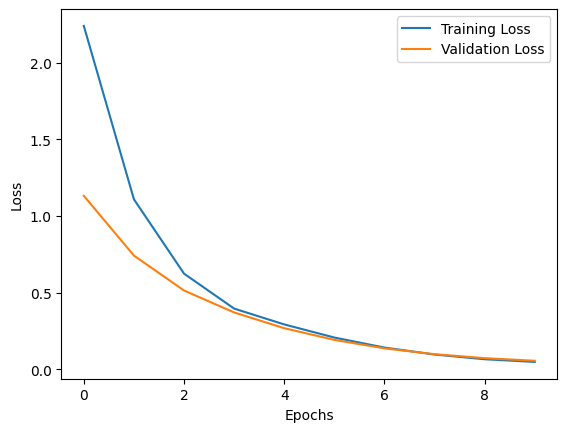

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

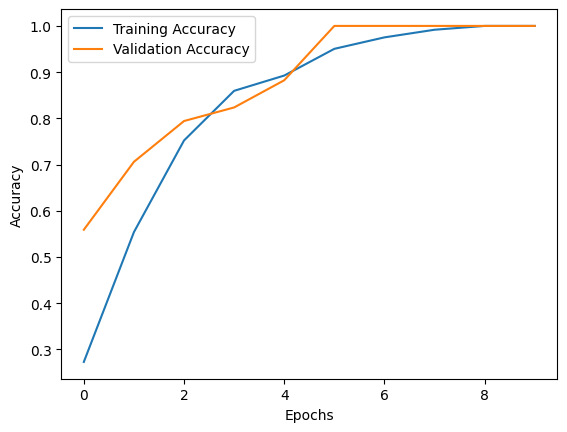

In [ ]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


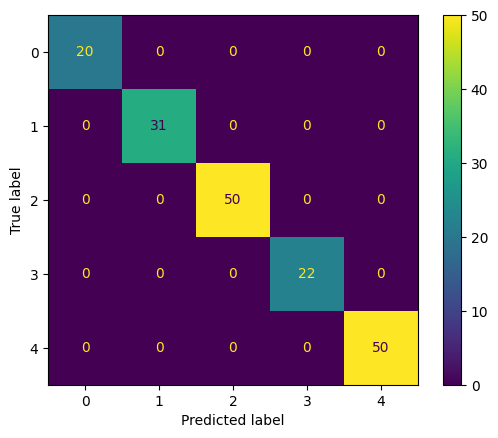

In [ ]:
img_confusion = confusion_matrix(y, model.predict(x).argmax(axis=1))
disp=ConfusionMatrixDisplay(img_confusion,display_labels=[0, 1, 2, 3, 4])
disp.plot()